#### Name: {Broker}, {Carl}
#### Assignment: {13}

### Instructions
For each assignment use the provided template.  Use proper markdown and coding syntax.  

If you have note used Jupyter Notebooks before, please review: https://realpython.com/jupyter-notebook-introduction/

# Questions: R14.6, R14.16, R14.12

In [1]:
# Copyright 2013, Michael H. Goldwasser
#
# Developed for use with the book:
#
#    Data Structures and Algorithms in Python
#    Michael T. Goodrich, Roberto Tamassia, and Michael H. Goldwasser
#    John Wiley & Sons, 2013
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

class Graph:
  """Representation of a simple graph using an adjacency map."""

  #------------------------- nested Vertex class -------------------------
  class Vertex:
    """Lightweight vertex structure for a graph."""
    __slots__ = '_element'
  
    def __init__(self, x):
      """Do not call constructor directly. Use Graph's insert_vertex(x)."""
      self._element = x
  
    def element(self):
      """Return element associated with this vertex."""
      return self._element
  
    def __hash__(self):         # will allow vertex to be a map/set key
      return hash(id(self))

    def __str__(self):
      return str(self._element)
    
  #------------------------- nested Edge class -------------------------
  class Edge:
    """Lightweight edge structure for a graph."""
    __slots__ = '_origin', '_destination', '_element'
  
    def __init__(self, u, v, x):
      """Do not call constructor directly. Use Graph's insert_edge(u,v,x)."""
      self._origin = u
      self._destination = v
      self._element = x
  
    def endpoints(self):
      """Return (u,v) tuple for vertices u and v."""
      return (self._origin, self._destination)
  
    def opposite(self, v):
      """Return the vertex that is opposite v on this edge."""
      if not isinstance(v, Graph.Vertex):
        raise TypeError('v must be a Vertex')
      return self._destination if v is self._origin else self._origin
      raise ValueError('v not incident to edge')
  
    def element(self):
      """Return element associated with this edge."""
      return self._element
  
    def __hash__(self):         # will allow edge to be a map/set key
      return hash( (self._origin, self._destination) )

    def __str__(self):
      return '({0},{1},{2})'.format(self._origin,self._destination,self._element)
    
  #------------------------- Graph methods -------------------------
  def __init__(self, directed=False):
    """Create an empty graph (undirected, by default).

    Graph is directed if optional paramter is set to True.
    """
    self._outgoing = {}
    # only create second map for directed graph; use alias for undirected
    self._incoming = {} if directed else self._outgoing

  def _validate_vertex(self, v):
    """Verify that v is a Vertex of this graph."""
    if not isinstance(v, self.Vertex):
      raise TypeError('Vertex expected')
    if v not in self._outgoing:
      raise ValueError('Vertex does not belong to this graph.')
    
  def is_directed(self):
    """Return True if this is a directed graph; False if undirected.

    Property is based on the original declaration of the graph, not its contents.
    """
    return self._incoming is not self._outgoing # directed if maps are distinct

  def vertex_count(self):
    """Return the number of vertices in the graph."""
    return len(self._outgoing)

  def vertices(self):
    """Return an iteration of all vertices of the graph."""
    return self._outgoing.keys()

  def edge_count(self):
    """Return the number of edges in the graph."""
    total = sum(len(self._outgoing[v]) for v in self._outgoing)
    # for undirected graphs, make sure not to double-count edges
    return total if self.is_directed() else total // 2

  def edges(self):
    """Return a set of all edges of the graph."""
    result = set()       # avoid double-reporting edges of undirected graph
    for secondary_map in self._outgoing.values():
      result.update(secondary_map.values())    # add edges to resulting set
    return result

  def get_edge(self, u, v):
    """Return the edge from u to v, or None if not adjacent."""
    self._validate_vertex(u)
    self._validate_vertex(v)
    return self._outgoing[u].get(v)        # returns None if v not adjacent

  def degree(self, v, outgoing=True):   
    """Return number of (outgoing) edges incident to vertex v in the graph.

    If graph is directed, optional parameter used to count incoming edges.
    """
    self._validate_vertex(v)
    adj = self._outgoing if outgoing else self._incoming
    return len(adj[v])

  def incident_edges(self, v, outgoing=True):   
    """Return all (outgoing) edges incident to vertex v in the graph.

    If graph is directed, optional parameter used to request incoming edges.
    """
    self._validate_vertex(v)
    adj = self._outgoing if outgoing else self._incoming
    for edge in adj[v].values():
      yield edge

  def insert_vertex(self, x=None):
    """Insert and return a new Vertex with element x."""
    v = self.Vertex(x)
    self._outgoing[v] = {}
    if self.is_directed():
      self._incoming[v] = {}        # need distinct map for incoming edges
    return v
      
  def insert_edge(self, u, v, x=None):
    """Insert and return a new Edge from u to v with auxiliary element x.

    Raise a ValueError if u and v are not vertices of the graph.
    Raise a ValueError if u and v are already adjacent.
    """
    if self.get_edge(u, v) is not None:      # includes error checking
      raise ValueError('u and v are already adjacent')
    e = self.Edge(u, v, x)
    self._outgoing[u][v] = e
    self._incoming[v][u] = e

# R14.6 Suppose we represent a graph G having n vertices and m edges with the edge list structure. Why, in this case, does the insert_vertex method run in O(1) time while the remove_vertex method runs in O(m) time?

Answer:
    
The insert_vertex function runs in O(1) time because inserting a new vertex requires only the insertion of the new vertex followed by the insertion of its corresponding edges (both take O(1) time).

The remove_vertex function takes O(m) time because when removing a vertex, the edges need to be removed or updated so that they are not referenced. Each edge in the list must be checked. As a result the time taken for removing a vertex takes O(m) where m is the number of edges. 

# R14.12 Explain why the DFS traversal runs in O(n2) time on an n-vertex simple graph that is represented with the adjacency matrix structure.

Answer:

We have a connected graph with V nodes and E edges. In DFS, we need to traverse across each node exactly once. Therefore, the time complexity is at least O(V).

Increased complexity comes from the way in which we find all the paths/edges for each node, this depends on the way the graph is implemented. If an edge leads you to a node that has already been traversed, we skip it and check the next node. DFS traversals use a hash table to maintain a list of traversed nodes so we may quickly find out if we have encountered a node before in O(1) time. 

If we are using an adjacency matrix (a V x V array), then for each node we traverse an entire for of length V in the matrix to find all of its outgoing edges. Each row corresponds to a node in the graph, as well as information about edges stemming from the node. The complexity of DFS is O(V * V) = O(V^2).

When representing a graph with an agency matrix we use a "n x n" matrix. When running a DFS, we traverse the row relative to that vertex to find all neighboring vertices. We only travers the neighboring vertices of the vertex. The complexity becomes O(n2).

# R14.16

Let G be an undirected graph whose vertices are the integers 1 through 8,
and let the adjacent vertices of each vertex be given by the table below:
vertex adjacent vertices
1 (2, 3, 4)
2 (1, 3, 4)
3 (1, 2, 4)
4 (1, 2, 3, 6)
5 (6, 7, 8)
6 (4, 5, 7)
7 (5, 6, 8)
8 (5, 7)
Assume that, in a traversal of G, the adjacent vertices of a given vertex are
returned in the same order as they are listed in the table above.
a. Draw G.
b. Give the sequence of vertices of G visited using a DFS traversal
starting at vertex 1.
c. Give the sequence of vertices visited using a BFS traversal starting
at vertex 1.

a.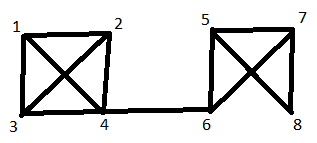

b.The sequence of vertices visited using DFS: 1,2,3,4,6,5,7,8.

c.The sequences of vertcies vised using BFS:1,2,3,4,6,5,7,8.

End of notebook. -CJB 12/8/19